# LDA & QDA

In [1]:
library(MASS)
library(tidyverse)
library(ggplot2)

set.seed(2022)

── Attaching packages ──────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ─────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


## Slides
### 1D

In [2]:
a <- rnorm(200, mean=1, sd=1)
b <- rnorm(200, mean=-1, sd=1)
mydata <- data.frame(x=c(a,b), class=c(rep("Yes", 200), rep("No", 200)))

Saving 7 x 7 in image



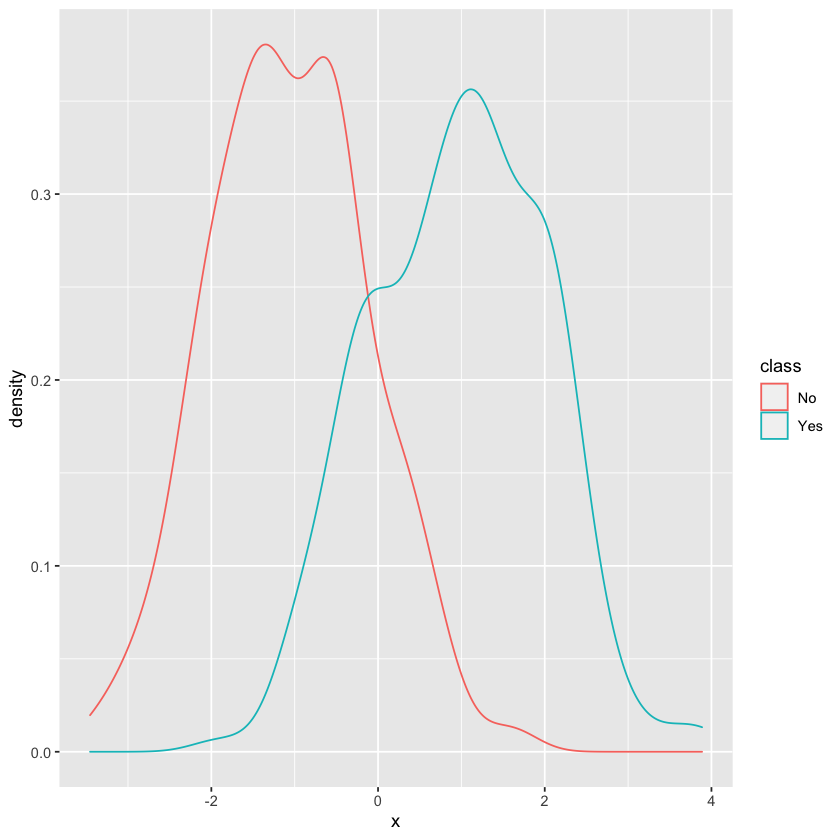

In [3]:
ggplot(aes(x=x, color=class), data=mydata) + geom_density()
ggsave("densities.png")

Call:
lda(class ~ x, data = mydata)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
             x
No  -1.0603693
Yes  0.9684368

Coefficients of linear discriminants:
      LD1
x 1.01339

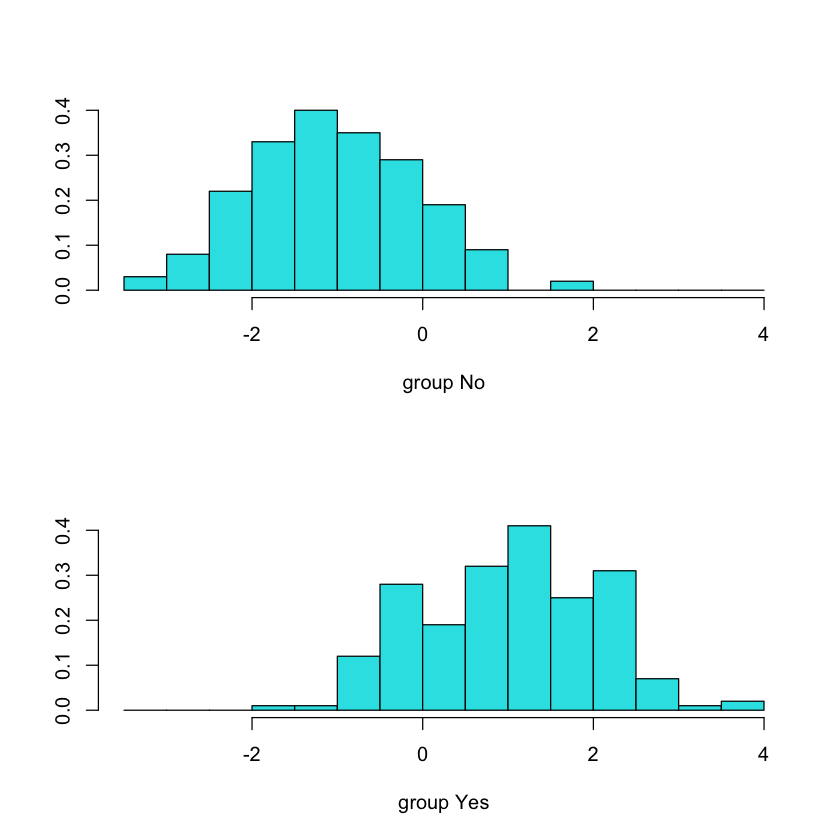

In [4]:
fit <- lda(class~x, data=mydata)
fit

plot(fit)

In [5]:
pred1d <- predict(fit, mydata %>% select(x))

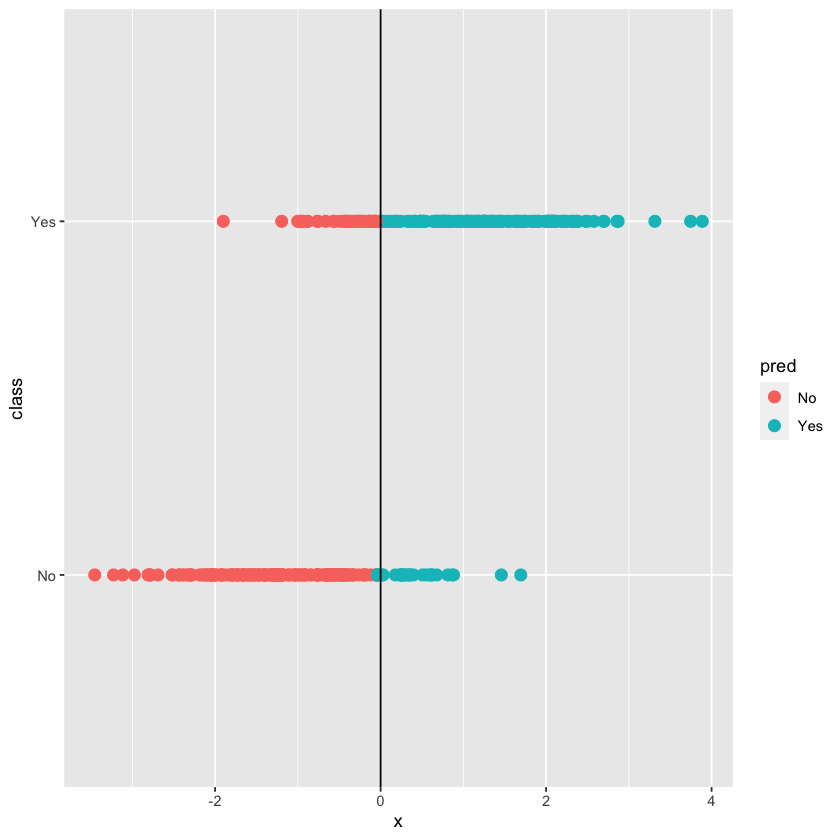

In [6]:
pred <- cbind(mydata, pred = pred1d$class)

ggplot(pred, aes(x = x, y = class, color = pred)) + geom_point(size = 3) + 
    geom_vline(aes(xintercept = 0))

In [7]:
table(pred$class, pred$pred)

     
       No Yes
  No  170  30
  Yes  42 158

Saving 7 x 7 in image



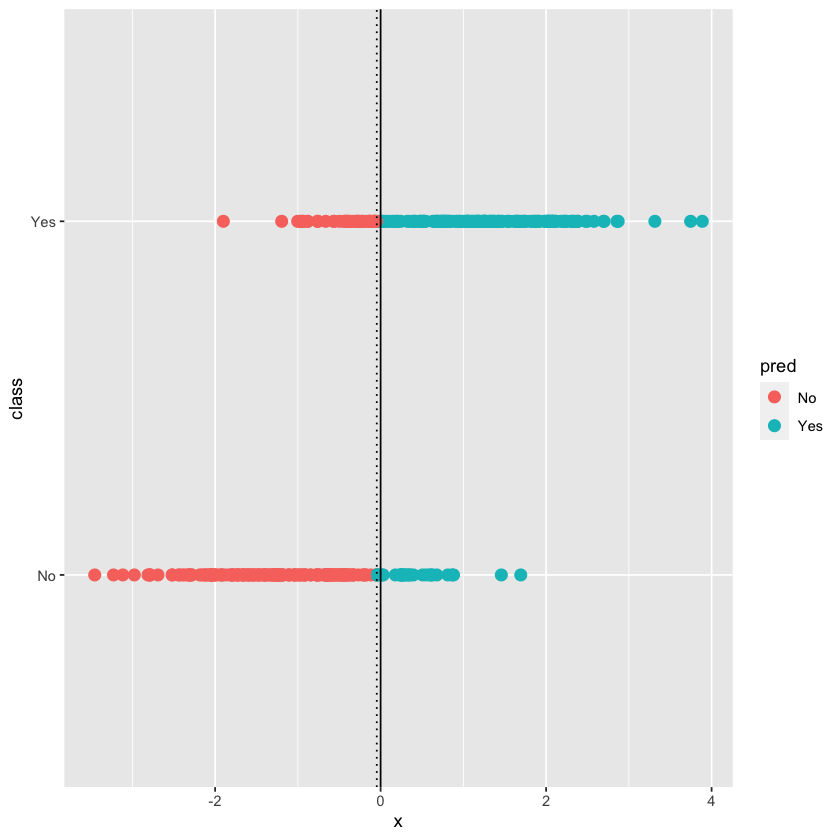

In [9]:
a <- pred %>% filter(pred == "Yes") %>% select(x) %>% min()
b <- pred %>% filter(pred == "No") %>% select(x) %>% max()

ggplot(pred, aes(x = x, y = class, color = pred)) + geom_point(size = 3) + 
    geom_vline(aes(xintercept = 0)) + 
    geom_vline(aes(xintercept = (a + b)/2), linetype = "dotted")
ggsave("1D.png")

### 2D

In [10]:
a <- mvrnorm(200, c(1,1), matrix(c(1,0,0,1),2,2))
b <- mvrnorm(200, c(2,2), matrix(c(1,0,0,1),2,2))

mydata <- data.frame(x1=c(a[,1],b[,1]), x2=c(a[,2],b[,2]), class=c(rep("Yes", 200), rep("No", 200)))
mydata

x1,x2,class
<dbl>,<dbl>,<chr>
0.6242647,1.825340970,Yes
1.1475328,-1.150715015,Yes
1.0517988,1.275747006,Yes
1.5407419,2.067205521,Yes
1.9400792,2.719872430,Yes
1.4461211,1.299964771,Yes
1.8028718,2.099410845,Yes
1.2098394,1.514617982,Yes
1.0290730,1.489451273,Yes


Saving 7 x 7 in image



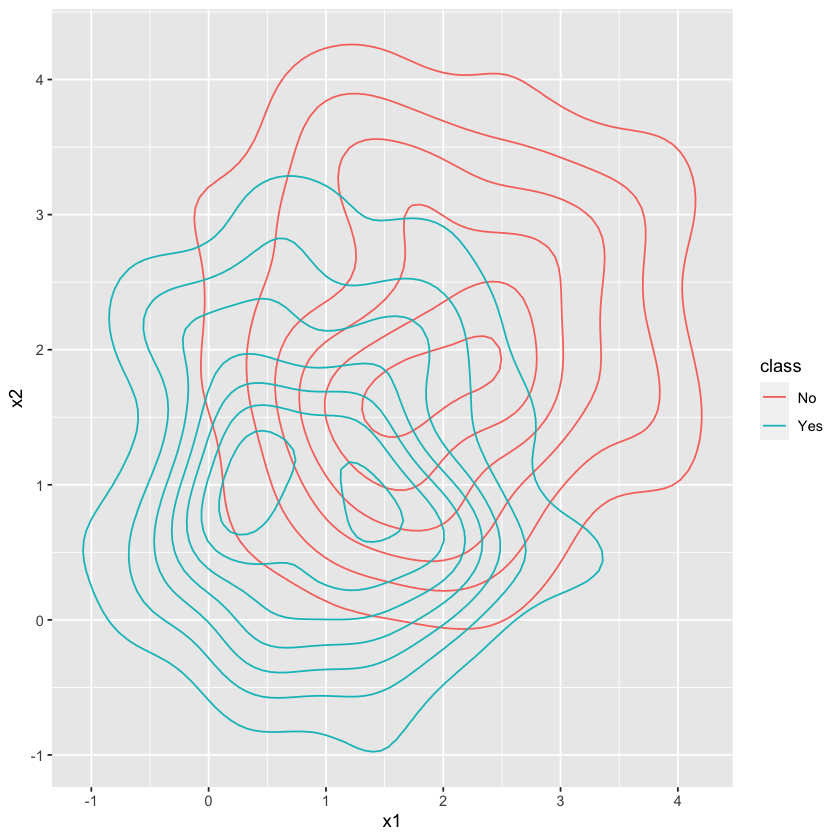

In [11]:
ggplot(aes(x=x1, y=x2, color=class), data=mydata) + geom_density_2d()
ggsave("density2D.png")

Call:
lda(class ~ x1 + x2, data = mydata)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
           x1       x2
No  1.9891884 2.052101
Yes 0.9763896 1.023083

Coefficients of linear discriminants:
          LD1
x1 -0.6984124
x2 -0.6942527

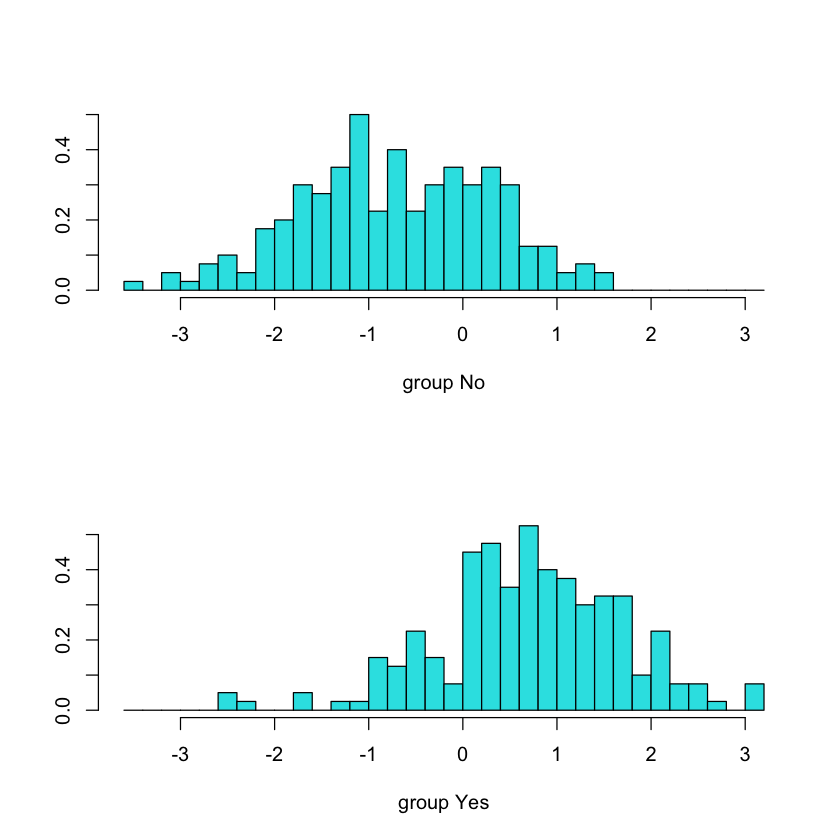

In [12]:
fit <- lda(class~x1+x2, data=mydata)
fit

plot(fit)

In [13]:
plda <- predict(fit, mydata %>% select(x1, x2))
plda$posterior[1:5,]

,No,Yes
1,0.36159142,0.6384086
2,0.04804396,0.9519560
3,0.33483111,0.6651689
4,0.64113694,0.3588631
5,0.83493970,0.1650603


In [14]:
pred <- cbind(mydata %>% select(x1, x2, class), pred = plda$class)
pred[1:5,]

,x1,x2,class,pred
,<dbl>,<dbl>,<chr>,<fct>
1,0.6242647,1.825341,Yes,Yes
2,1.1475328,-1.150715,Yes,Yes
3,1.0517988,1.275747,Yes,Yes
4,1.5407419,2.067206,Yes,No
5,1.9400792,2.719872,Yes,No


Saving 7 x 7 in image



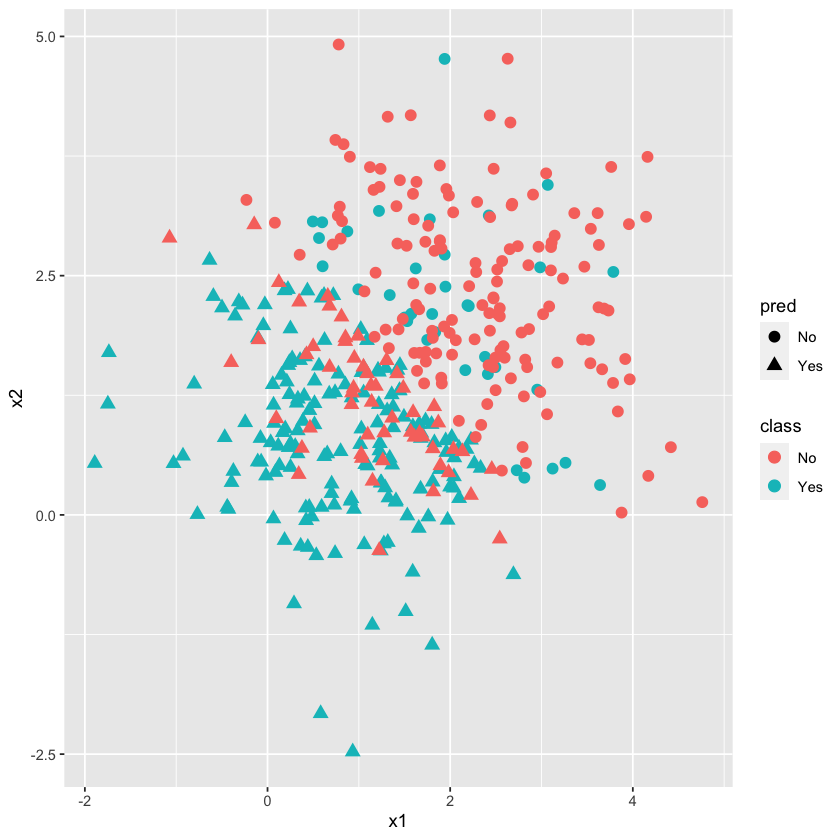

In [15]:
ggplot(pred, aes(x=x1, y=x2)) + 
    geom_point(size = 3, aes(pch = pred, col= class))
ggsave("2D.png")

Saving 7 x 7 in image



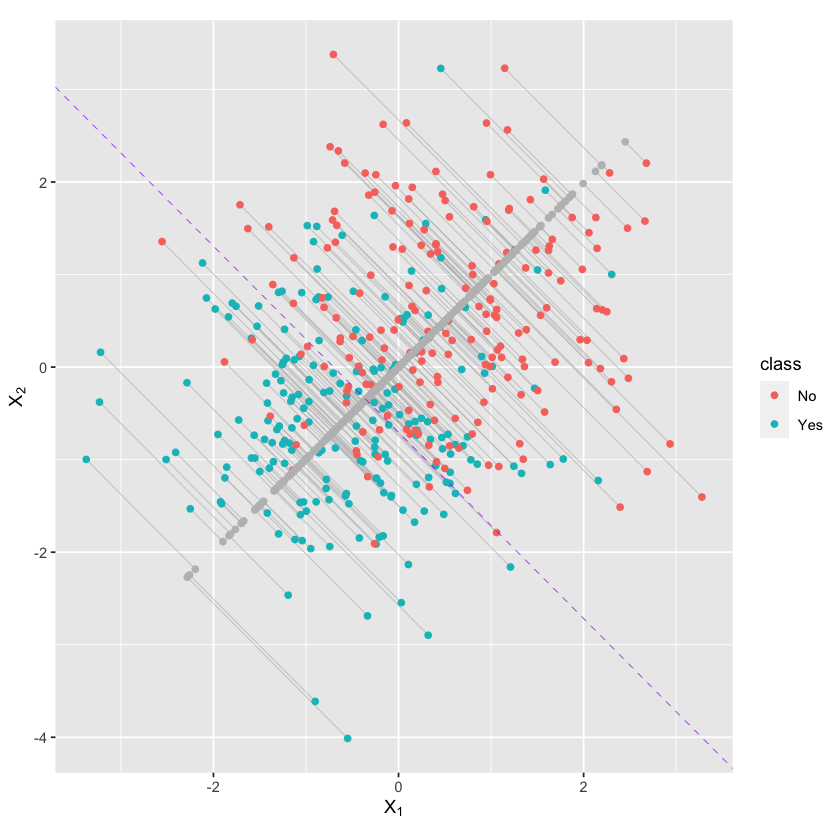

In [16]:
#devtools::install_github("gastonstat/DiscriMiner")

library(DiscriMiner) # For scatter matrices

# Center data
Z <- scale(mydata %>% select(x1,x2), scale = FALSE)

# Scatter matrices
B <- betweenCov(variables = mydata %>% select(x1,x2), group = mydata$class)
W <- withinCov(variables = mydata %>% select(x1,x2), group = mydata$class)

# Eigenvectors
ev <- eigen(solve(W) %*% B)$vectors
slope <- - ev[1,1] / ev[2,1]
intercept <- ev[2,1]

# Create projections on 1st discriminant
P <- Z %*% ev[,1] %*% t(ev[,1])

# Plot
my.df <- data.frame(Z1 = Z[,1], Z2 = Z[,2], P1 = P[,1], P2 = P[,2], class = mydata$class)

ggplot(data = my.df, aes(Z1, Z2)) +
    geom_segment(aes(xend = P1, yend = P2), size = 0.2, color = "gray") +
    geom_point(aes(color = class)) +
    geom_point(aes(x = P1, y = P2), color = "gray") +
    geom_abline(intercept = intercept, slope = slope, size = 0.2, linetype="dashed", color="purple") +
    coord_fixed() +
    xlab(expression(X[1])) + ylab(expression(X[2]))
ggsave("proj2D.png")

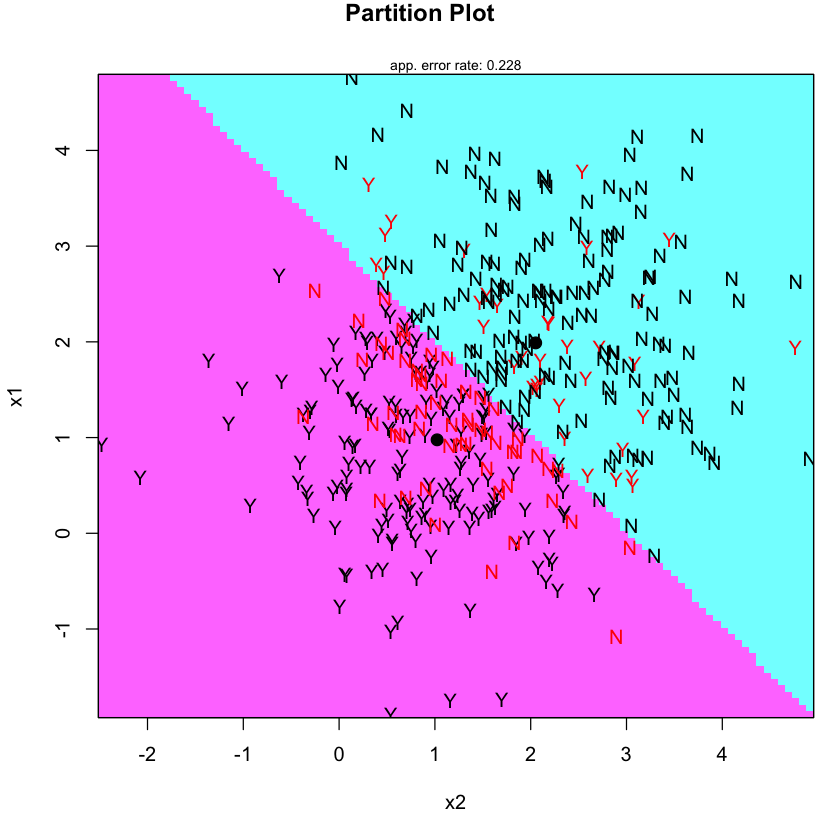

In [17]:
library(klaR)

partimat(factor(class) ~ ., data=mydata, method="lda")

Saving 7 x 7 in image



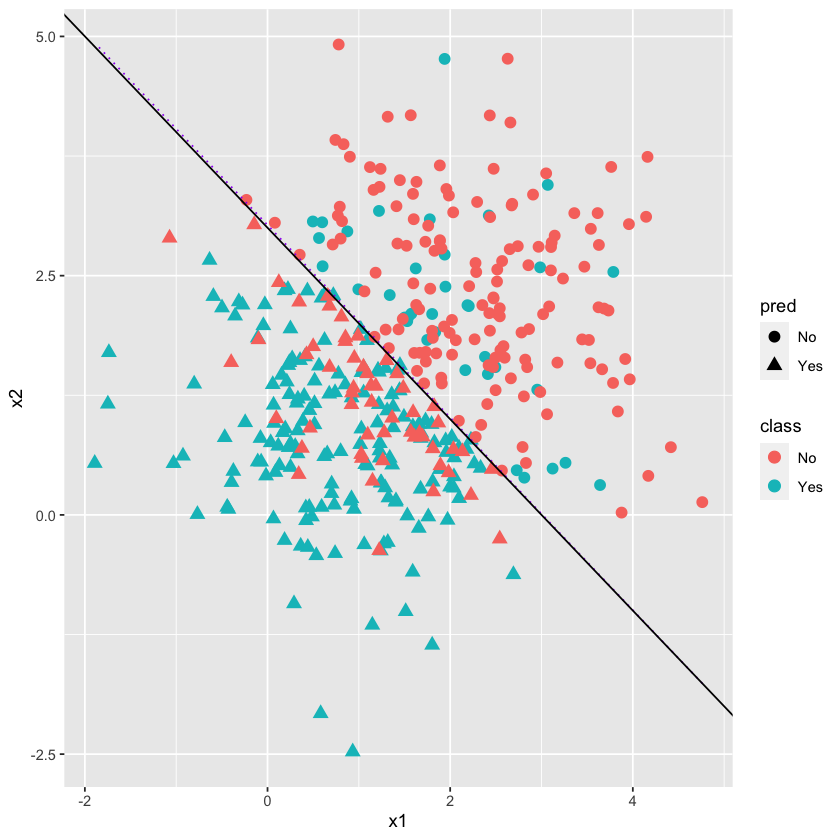

In [18]:
x <- seq(min(pred$x1), max(pred$x1), length.out=30)
y <- seq(min(pred$x2), max(pred$x2), length.out=30)
Xcon <- matrix(c(rep(x,length(y)), rep(y, rep(length(x), length(y)))),,2)

pr <- predict(fit, data.frame(x1=Xcon[,1], x2=Xcon[,2]))$post[, "Yes"]
the_contour <- data.frame(x=rep(x, length(y)), y=rep(y, each=length(x)), z=as.vector(pr))

ggplot(pred, aes(x=x1, y=x2)) + 
    geom_point(size = 3, aes(pch = pred, col= class)) +
    geom_contour(data=the_contour, aes(x=x, y=y, z=z), , breaks=c(0,.5), color="purple", linetype="dotted") +
    geom_abline(aes(intercept=3, slope=-1))
ggsave("2D.png")

## 2D and 3 classes

## Iris Data
When there are more than two groups we can estimate more than one discriminant function:
## $D_1=\beta_{0_1}+\beta_{1_1}X_1+\beta_{2_1}X_2+\ldots+\beta_{i_1}X_i$
## $D_2=\beta_{0_2}+\beta_{1_2}X_1+\beta_{2_2}X_2+\ldots+\beta_{i_2}X_i$
For example, when there are three groups, we could estimate (1) a function for discriminating between group 1 and groups 2 and 3 combined, and (2) another function for discriminating between group 2 and group 3.
### LDA

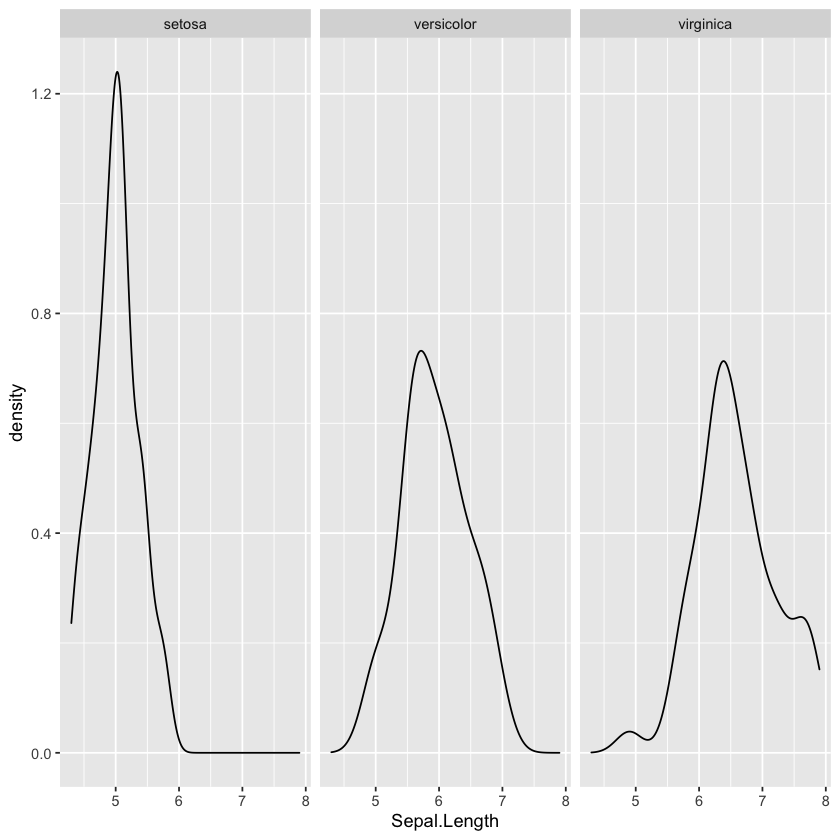

In [19]:
data(iris)

# First check LDA assumtions!
#1 The observations are a random sample: we will assume there are...

#2 Each independent variable has a normal distribution for each class
# Check it for every predictor variable...
ggplot(iris %>% select(Sepal.Length, Species), aes(x=Sepal.Length)) + geom_density() + facet_wrap(~ Species)

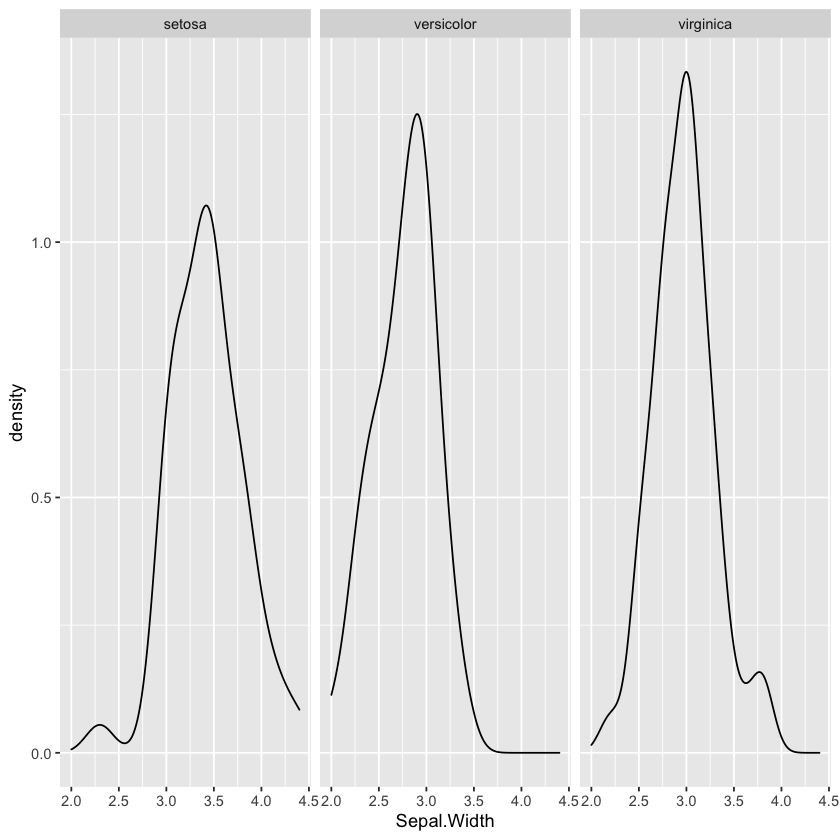

In [20]:
ggplot(iris %>% select(Sepal.Width, Species), aes(x=Sepal.Width)) + geom_density() + facet_wrap(~ Species)

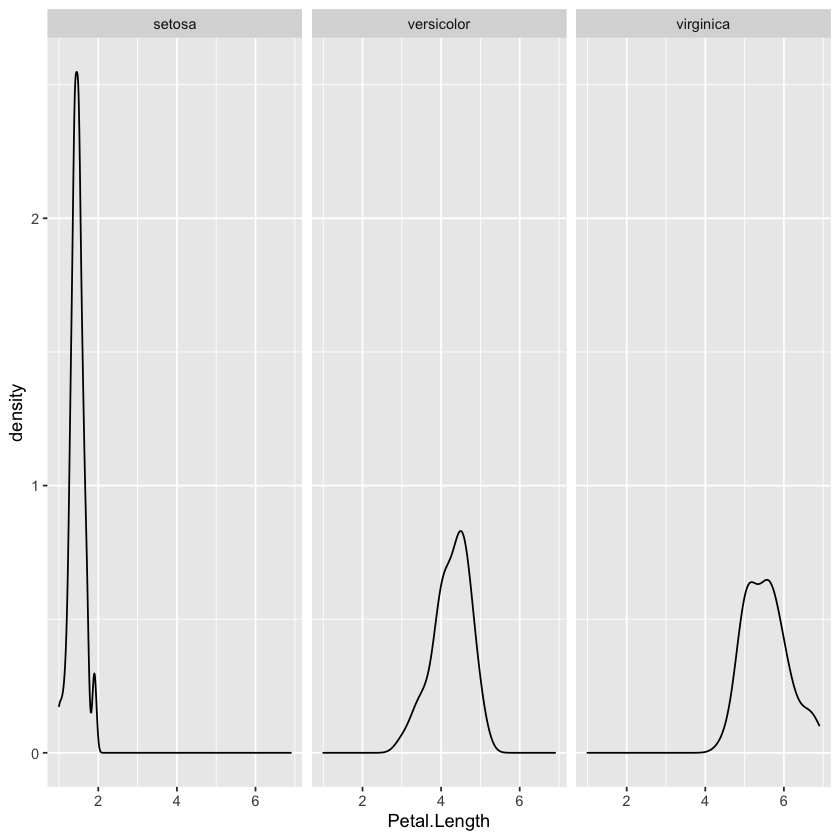

In [21]:
ggplot(iris %>% select(Petal.Length, Species), aes(x=Petal.Length)) + geom_density() + facet_wrap(~ Species)

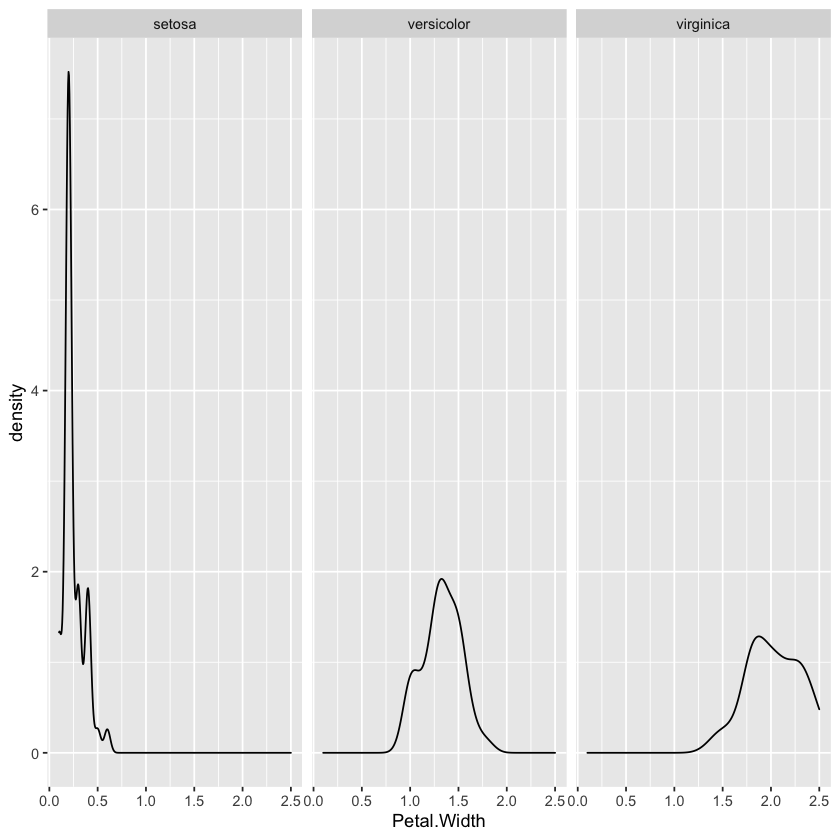

In [22]:
ggplot(iris %>% select(Petal.Width, Species), aes(x=Petal.Width)) + geom_density() + facet_wrap(~ Species)

In [23]:
?shapiro.test

shapiro.test(rnorm(100, mean = 5, sd = 3))
shapiro.test(runif(100, min = 2, max = 4))


	Shapiro-Wilk normality test

data:  rnorm(100, mean = 5, sd = 3)
W = 0.98298, p-value = 0.2254



	Shapiro-Wilk normality test

data:  runif(100, min = 2, max = 4)
W = 0.95761, p-value = 0.002727


In [24]:
p1 <- iris %>% filter(Species == "setosa") %>% select(Sepal.Length)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "versicolor") %>% select(Sepal.Length)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "virginica") %>% select(Sepal.Length)
shapiro.test(p1[,1])


	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.9777, p-value = 0.4595



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.97784, p-value = 0.4647



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.97118, p-value = 0.2583


In [25]:
p1 <- iris %>% filter(Species == "setosa") %>% select(Sepal.Width)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "versicolor") %>% select(Sepal.Width)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "virginica") %>% select(Sepal.Width)
shapiro.test(p1[,1])


	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.97172, p-value = 0.2715



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.97413, p-value = 0.338



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.96739, p-value = 0.1809


In [26]:
p1 <- iris %>% filter(Species == "setosa") %>% select(Petal.Length)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "versicolor") %>% select(Petal.Length)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "virginica") %>% select(Petal.Length)
shapiro.test(p1[,1])


	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.95498, p-value = 0.05481



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.966, p-value = 0.1585



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.96219, p-value = 0.1098


In [27]:
p1 <- iris %>% filter(Species == "setosa") %>% select(Petal.Width)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "versicolor") %>% select(Petal.Width)
shapiro.test(p1[,1])

p1 <- iris %>% filter(Species == "virginica") %>% select(Petal.Width)
shapiro.test(p1[,1])


	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.79976, p-value = 8.659e-07



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.94763, p-value = 0.02728



	Shapiro-Wilk normality test

data:  p1[, 1]
W = 0.95977, p-value = 0.08695


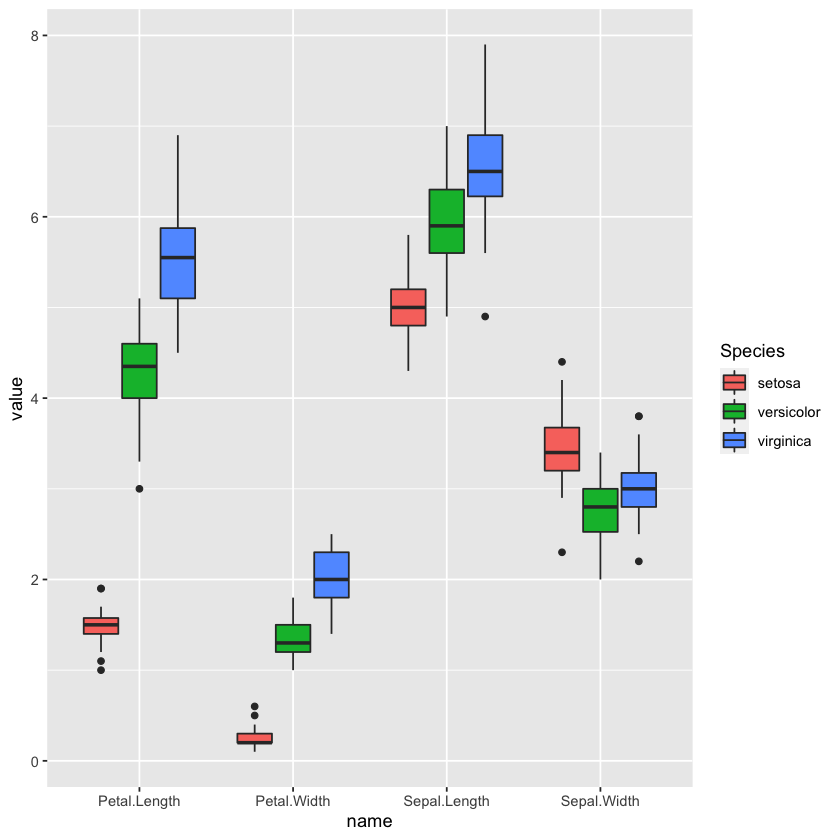

In [28]:
#3 Homogeneity of variance-covariance matrices

ggplot(iris %>% pivot_longer(c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)), 
       aes(x=name, y=value, fill=Species)) + geom_boxplot()

In [29]:
var(iris %>% filter(Species == "setosa") %>% select(-Species))
var(iris %>% filter(Species == "versicolor") %>% select(-Species))
var(iris %>% filter(Species == "virginica") %>% select(-Species))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.12424898,0.099216327,0.016355102,0.010330612
Sepal.Width,0.09921633,0.143689796,0.011697959,0.009297959
Petal.Length,0.01635510,0.011697959,0.030159184,0.006069388
Petal.Width,0.01033061,0.009297959,0.006069388,0.011106122


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.26643265,0.08518367,0.18289796,0.05577959
Sepal.Width,0.08518367,0.09846939,0.08265306,0.04120408
Petal.Length,0.18289796,0.08265306,0.22081633,0.07310204
Petal.Width,0.05577959,0.04120408,0.07310204,0.03910612


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.40434286,0.09376327,0.30328980,0.04909388
Sepal.Width,0.09376327,0.10400408,0.07137959,0.04762857
Petal.Length,0.30328980,0.07137959,0.30458776,0.04882449
Petal.Width,0.04909388,0.04762857,0.04882449,0.07543265


If the data is normally distributed then we preform a Bartlett’s test with `bartlett.test` in R

In [30]:
bartlett.test(x1 ~ class, mydata)


	Bartlett test of homogeneity of variances

data:  x1 by class
Bartlett's K-squared = 1.1173, df = 1, p-value = 0.2905


In [31]:
# Sepal.Length is normally distributed so:
bartlett.test(Sepal.Length ~ Species, iris)


	Bartlett test of homogeneity of variances

data:  Sepal.Length by Species
Bartlett's K-squared = 16.006, df = 2, p-value = 0.0003345


In [32]:
# Sepal.Width is normally distributed so:
bartlett.test(Sepal.Width ~ Species, iris)


	Bartlett test of homogeneity of variances

data:  Sepal.Width by Species
Bartlett's K-squared = 2.0911, df = 2, p-value = 0.3515


In [33]:
# Petal.Length is normally distributed so:
bartlett.test(Petal.Length ~ Species, iris)


	Bartlett test of homogeneity of variances

data:  Petal.Length by Species
Bartlett's K-squared = 55.423, df = 2, p-value = 9.229e-13


Levene’s test is an alternative to Bartlett’s test when the data is not normally distributed.

In [34]:
library(car)

?leveneTest

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [35]:
leveneTest(Petal.Width ~ Species, iris)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,19.89244,2.26052e-08
,147,NA,NA


Now we can apply LDA... taking into account the previous tests

In [38]:
data(iris)

iris$id <- 1:nrow(iris)
iris.train <- iris %>% sample_frac(.75)
iris.test <- anti_join(iris, iris.train, by = 'id')

iris.lda <- lda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = iris.train)
iris.lda

Call:
lda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
    data = iris.train)

Prior probabilities of groups:
    setosa versicolor  virginica 
    0.3125     0.3125     0.3750 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         5.022857    3.454286     1.465714   0.2628571
versicolor     5.854286    2.737143     4.214286   1.3000000
virginica      6.609524    2.973810     5.580952   2.0309524

Coefficients of linear discriminants:
                    LD1        LD2
Sepal.Length  0.7006566 -0.4439418
Sepal.Width   1.3918094 -1.9738433
Petal.Length -2.0776964  0.9484096
Petal.Width  -2.7328265 -2.4724242

Proportion of trace:
   LD1    LD2 
0.9891 0.0109 

In [39]:
plda <- predict(iris.lda, iris.test %>% select(-Species, -id))
plda$posterior[1:5,]

,setosa,versicolor,virginica
1,1,7.257372e-18,1.024066e-36
2,1,3.134774e-15,3.014184e-33
3,1,4.835585e-17,3.909165e-35
4,1,2.610036e-18,4.295273e-37
5,1,4.663001e-17,5.638756e-36


Saving 7 x 7 in image



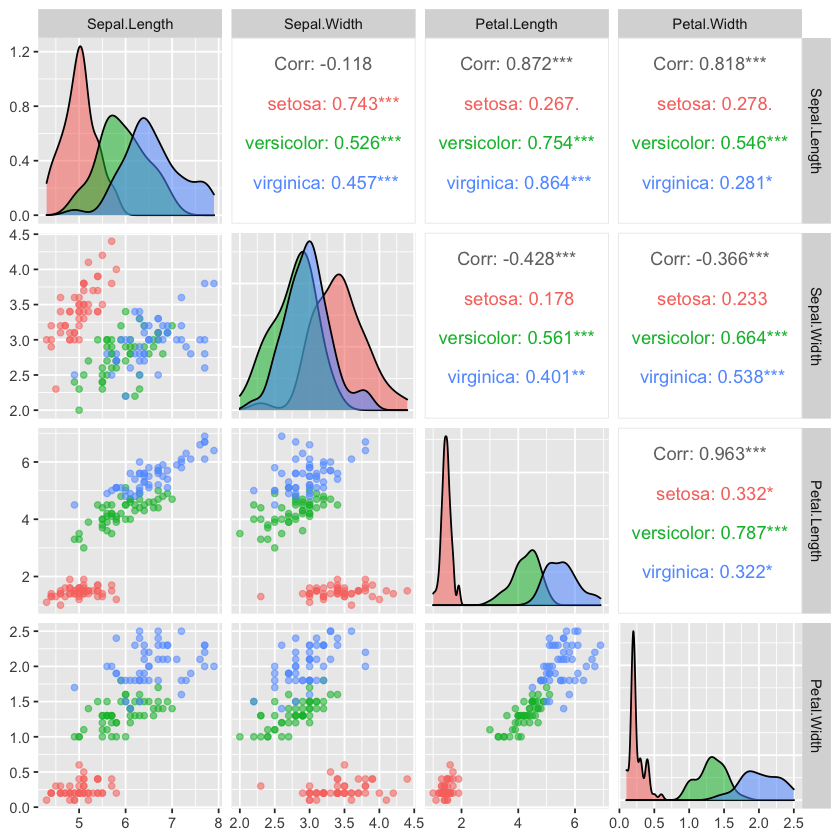

In [67]:
library("GGally")

ggpairs(iris, columns = 1:4, aes(color = Species, alpha = 0.5))
ggsave("Iris_2D.png")

In [41]:
transformed <- predict(iris.lda, iris %>% select(-Species))
transformed$x[1:5,]

,LD1,LD2
1,8.078354,-0.2874794
2,7.242318,0.7882306
3,7.588318,0.3874093
4,6.963532,0.8188697
5,8.147469,-0.4404696


Saving 7 x 7 in image



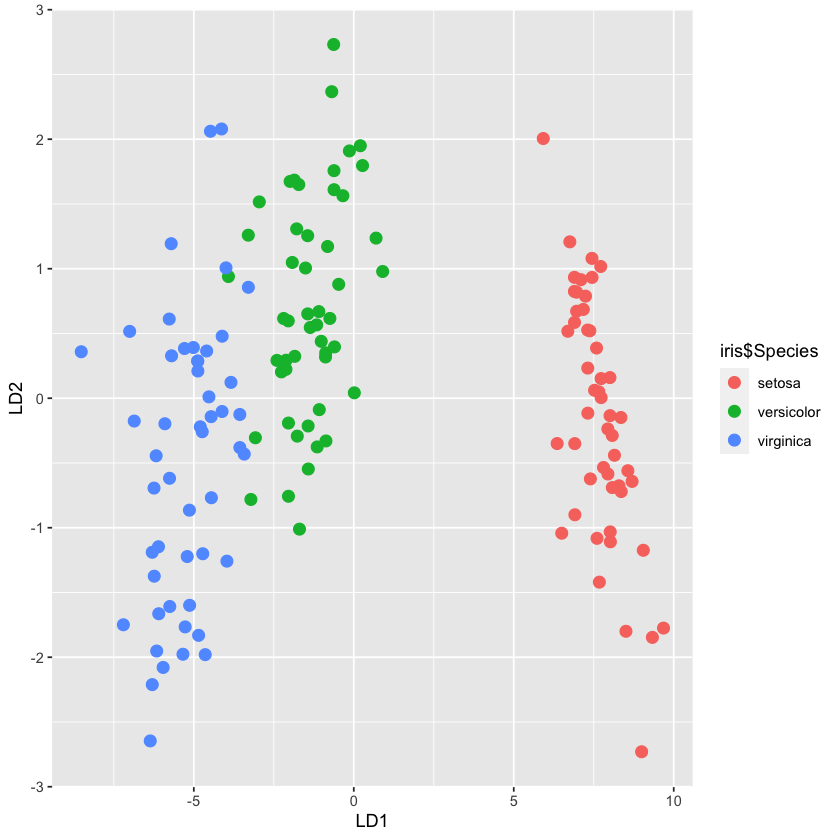

In [42]:
ggplot(as.data.frame(transformed$x), aes(x=LD1, y=LD2)) + geom_point(aes(color=iris$Species), size=3)
ggsave("Iris_2D_transf.png")

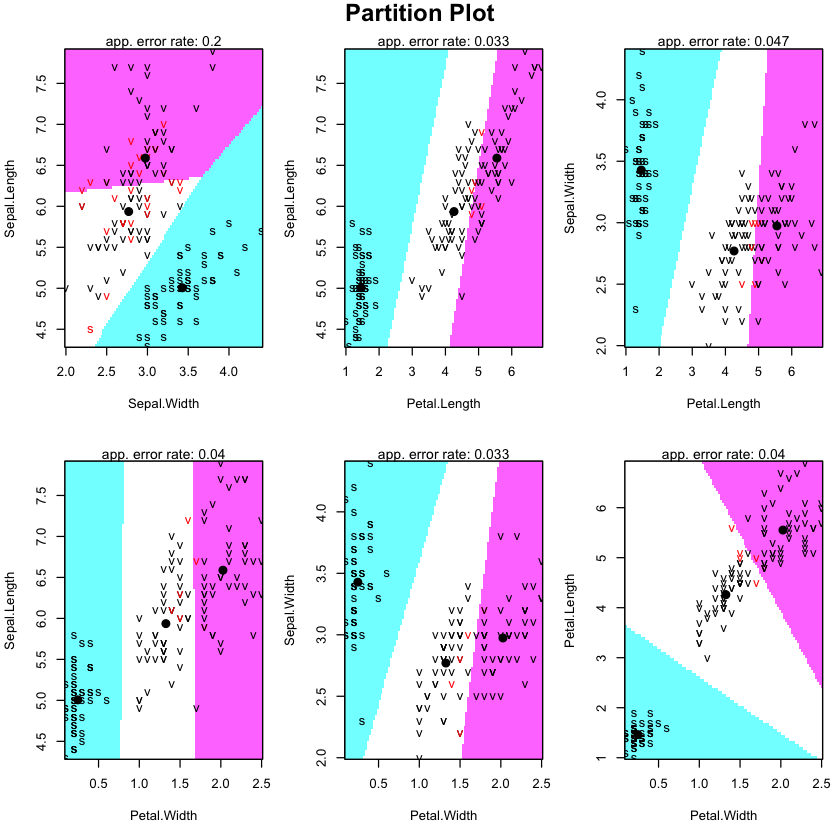

In [43]:
partimat(factor(Species) ~ ., data=iris %>% select(-id), method="lda")

In [44]:
table(iris.test$Species, plda$class)
mean(plda$class == iris.test$Species)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          1         7

[1] 0.9736842

### QDA

In [46]:
# QDA assumptions
# The same as LDA except for the covariance matrix...

# QDA
iris.qda <- qda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = iris.train)
iris.qda

Call:
qda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
    data = iris.train)

Prior probabilities of groups:
    setosa versicolor  virginica 
    0.3125     0.3125     0.3750 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         5.022857    3.454286     1.465714   0.2628571
versicolor     5.854286    2.737143     4.214286   1.3000000
virginica      6.609524    2.973810     5.580952   2.0309524

In [47]:
qda.pred <- predict(iris.qda, iris.test %>% select(-Species, -id))

data.frame(qda.pred)[1:5,]

,class,posterior.setosa,posterior.versicolor,posterior.virginica
,<fct>,<dbl>,<dbl>,<dbl>
1,setosa,1,1.662343e-24,1.372617e-35
2,setosa,1,4.501491e-21,2.292194e-31
3,setosa,1,2.826416e-25,1.351889e-33
4,setosa,1,2.606522e-27,4.712705e-37
5,setosa,1,5.982361e-23,1.622301e-34


In [48]:
table(qda.pred$class, iris.test$Species)
mean(qda.pred$class == iris.test$Species)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          1         7

[1] 0.9473684

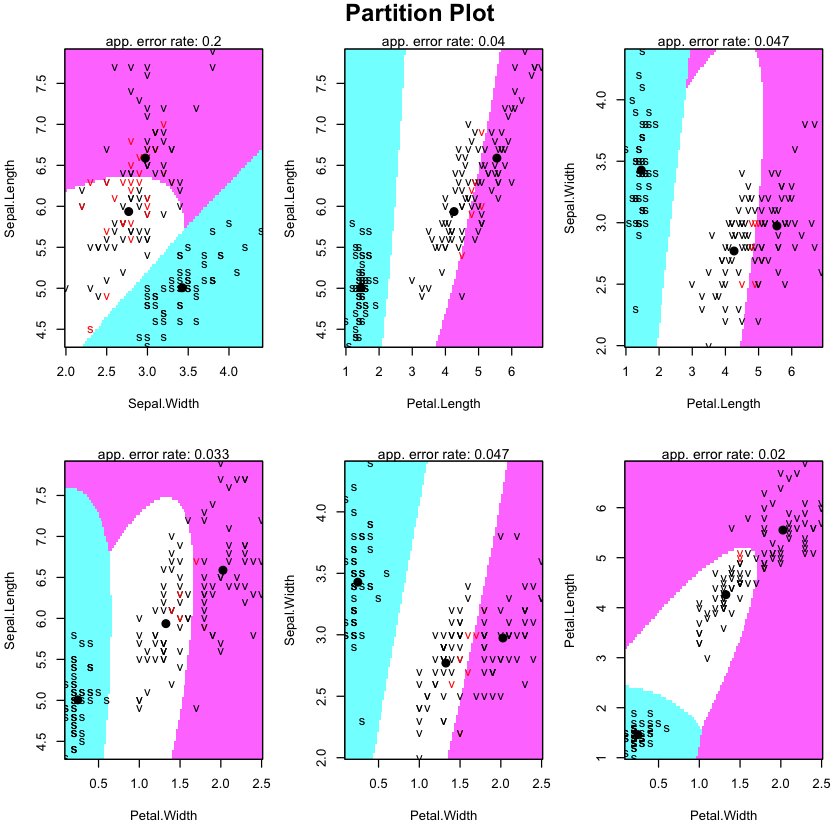

In [49]:
partimat(factor(Species) ~ ., data=iris %>% select(-id), method="qda")

### Using caret...

In [50]:
library(caret)

data(iris)
TrainData <- iris %>% select(-Species)
TrainClasses <- iris %>% pull(Species)

ldaFit <- train(TrainData, TrainClasses,
                method = "lda",
                preProcess = c("center", "scale"),
                tuneLength = 10,
                trControl = trainControl(method = "cv"))

ldaFit$finalModel

Loading required package: lattice

Registered S3 method overwritten by 'caret':
  method      from       
  print.plsda DiscriMiner


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Call:
lda(x, y)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa       -1.0111914   0.8504137   -1.3006301  -1.2507035
versicolor    0.1119073  -0.6592236    0.2843712   0.1661774
virginica     0.8992841  -0.1911901    1.0162589   1.0845261

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.6867795  0.01995817
Sepal.Width   0.6688251  0.94344183
Petal.Length -3.8857950 -1.64511887
Petal.Width  -2.1422387  2.16413593

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

In [51]:
confusionMatrix(ldaFit)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       32.0       0.7
  virginica     0.0        1.3      32.7
                          
 Accuracy (average) : 0.98


In [52]:
qdaFit <- train(TrainData, TrainClasses,
                method = "qda",
                preProcess = c("center", "scale"),
                tuneLength = 10,
                trControl = trainControl(method = "cv"))

qdaFit$finalModel

Call:
qda(x, y)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa       -1.0111914   0.8504137   -1.3006301  -1.2507035
versicolor    0.1119073  -0.6592236    0.2843712   0.1661774
virginica     0.8992841  -0.1911901    1.0162589   1.0845261

In [53]:
confusionMatrix(qdaFit)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       31.3       0.7
  virginica     0.0        2.0      32.7
                            
 Accuracy (average) : 0.9733


## Exercise 1
* Use Smarket data (without Today variable)
* Try with lda using all Lag variables.
* Repeat with qda and compare.

In [2]:
library("ISLR")

data(Smarket)
Smarket %>% select(-Today)

ERROR: Error in library("ISLR"): there is no package called 'ISLR'
